In [16]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [17]:
# load data with encode features

users_data = pd.read_pickle("../data/users_data_cleaned_and_encoded.pkl")
users_data.head()

,number_transactions,total_amount_usd,age,housing,loan,duration,campaign,pdays,previous,term_deposit,...,education_primary,education_secondary,education_tertiary,contact_Unknown,contact_cellular,contact_telephone,device_Unknown,device_desktop,device_mobile,device_tablet
0,3.0,2143.0,58,True,False,261,1,-1,0,False,...,0,0,1,1,0,0,0,0,1,0
1,0.0,0.0,44,True,False,151,1,-1,0,False,...,0,1,0,1,0,0,0,1,0,0
2,2.0,2.0,33,True,True,76,1,-1,0,False,...,0,1,0,1,0,0,0,0,1,0
3,0.0,0.0,47,True,False,92,1,-1,0,False,...,0,0,0,1,0,0,0,0,0,1
4,1.0,1.0,33,False,False,198,1,-1,0,False,...,0,0,0,1,0,0,0,0,1,0


In [18]:
users_data.shape

(45179, 37)

In [19]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45179 entries, 0 to 45215
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   number_transactions  45179 non-null  float64
 1   total_amount_usd     45179 non-null  float64
 2   age                  45179 non-null  int64  
 3   housing              45179 non-null  bool   
 4   loan                 45179 non-null  bool   
 5   duration             45179 non-null  int64  
 6   campaign             45179 non-null  int64  
 7   pdays                45179 non-null  int64  
 8   previous             45179 non-null  int64  
 9   term_deposit         45179 non-null  bool   
 10  tenure               45179 non-null  int64  
 11  job_Unknown          45179 non-null  uint8  
 12  job_admin.           45179 non-null  uint8  
 13  job_blue-collar      45179 non-null  uint8  
 14  job_entrepreneur     45179 non-null  uint8  
 15  job_housemaid        45179 non-null 

### Prepare the data for ML model

In [20]:
# define our X and y

target = users_data.total_amount_usd
features = users_data.drop(['total_amount_usd'], axis = 1)

In [21]:
target.shape

(45179,)

In [22]:
target

0        2143.0
1           0.0
2           2.0
3           0.0
4           1.0
          ...  
45211     825.0
45212    1729.0
45213    5715.0
45214       0.0
45215    2971.0
Name: total_amount_usd, Length: 45179, dtype: float64

In [23]:
features.shape

(45179, 36)

In [24]:
# split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(
                                                features, 
                                                target,
                                                test_size = 0.3, 
                                                random_state = 0)

In [25]:
# print the shape of the training data

print("Training Data")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# question how rows and columns does the training have

Training Data
X_train shape: (31625, 36)
y_train shape: (31625,)


In [26]:
# print the shape of the test data 

print("Test Data")
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Test Data
X_test shape: (13554, 36)
y_test shape: (13554,)


### Decision Tree Model

In [27]:
from sklearn.tree import DecisionTreeRegressor

clf_tree = DecisionTreeRegressor()
clf_tree.fit(X_train, y_train)
y_pred_dt = clf_tree.predict(X_test)
print("first five predicted values:", y_pred_dt[0:5])
print("first five actual values:", list(y_test[0:5]))



first five predicted values: [2850. 1623.    0.  704.    5.]
first five actual values: [1196.0, 566.0, 0.0, 4833.0, 3.0]


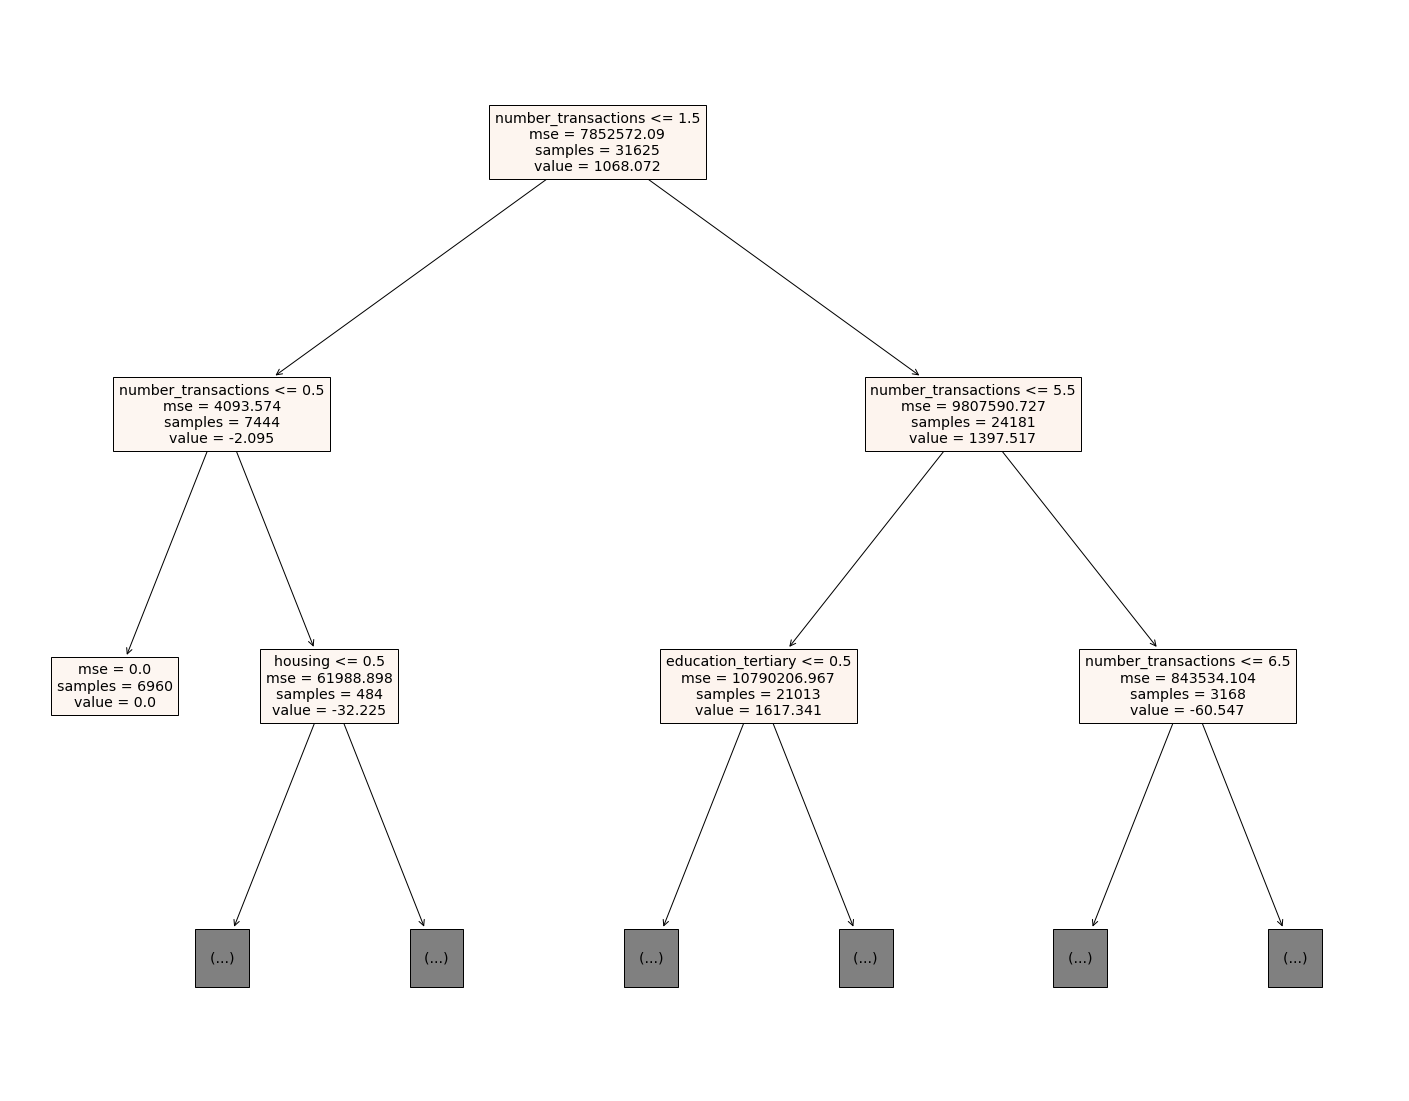

In [29]:
from sklearn import tree

fig = plt.figure(figsize=(25 , 20))
_ = tree.plot_tree(clf_tree, 
                   feature_names = list(X_train.columns),  
                   max_depth = 2,
                   filled = True)


In [23]:
r2 = r2_score(y_test, y_pred_dt)
print("R2:", round(r2, 2))
mae = mean_absolute_error(y_test, y_pred_dt)
print("Mean Absolute Error:", round(mae))
mse = mean_squared_error(y_test, y_pred_dt)
print("Mean Squared Error:", round(mse))

R2: -0.9
Mean Absolute Error: 1562
Mean Squared Error: 13582052


In [30]:
def feature_importance_plot(model, X_train, n):
    """Plots feature importance - this only works for Decision Tree Models"""
    plt.figure(figsize=(8, 5)) # set figure size
    feat_importances = pd.Series(model.feature_importances_,
                                 index = X_train.columns)
    feat_importances.nlargest(n).plot(kind = 'bar')
    plt.title(f"Top {n} Features")
    plt.show()

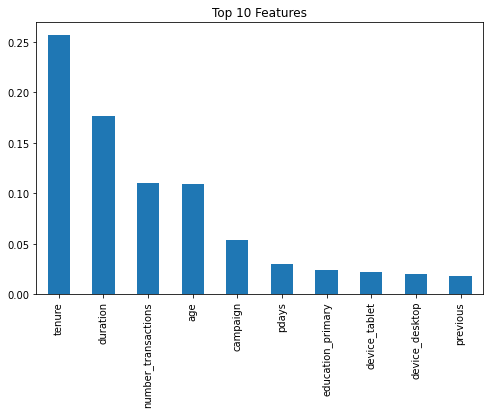

In [31]:
feature_importance_plot(clf_tree, X_train, n=10)

### Random Forest Model

In [32]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor().fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("first five predicted values:", y_pred_rf[0:5])
print("first five actual values:", list(y_test[0:5]))

first five predicted values: [2672.43  822.32    0.   2257.69 -131.16]
first five actual values: [1196.0, 566.0, 0.0, 4833.0, 3.0]


In [34]:
r2 = r2_score(y_test, y_pred_rf)
print("R2:", round(r2, 2))
mae = mean_absolute_error(y_test, y_pred_rf)
print("Mean Absolute Error:", round(mae))
mse = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error:", round(mse))

R2: 0.06
Mean Absolute Error: 1220
Mean Squared Error: 6705960


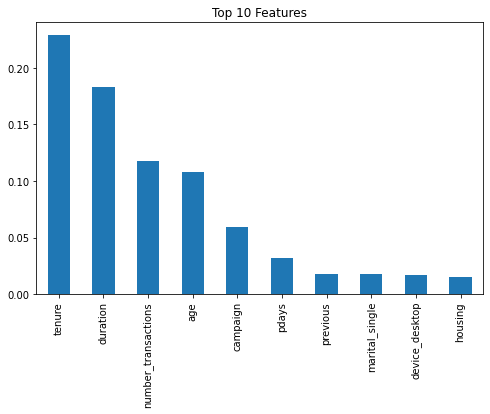

In [35]:
feature_importance_plot(rf, X_train, n=10)

### XGBoost Regressor

In [36]:
from xgboost import XGBRegressor

xgb = XGBRegressor().fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("first five predicted values:", y_pred_xgb[0:5])
print("first five actual values:", list(y_test[0:5]))

first five predicted values: [1232.5426  1083.8535   191.28148 1873.5494    70.70738]
first five actual values: [1196.0, 566.0, 0.0, 4833.0, 3.0]


In [37]:
r2 = r2_score(y_test, y_pred_xgb)
print("R2:", round(r2, 2))
mae = mean_absolute_error(y_test, y_pred_xgb)
print("Mean Absolute Error:", round(mae))
mse = mean_squared_error(y_test, y_pred_xgb)
print("Mean Squared Error:", round(mse))

R2: 0.05
Mean Absolute Error: 1217
Mean Squared Error: 6764436


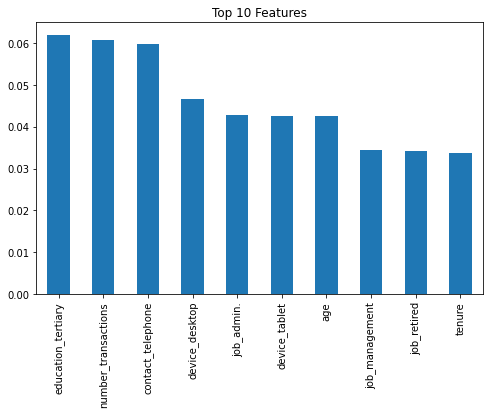

In [39]:
feature_importance_plot(xgb, X_train, n=10)

### Model selection - code for demo only, DO NOT USE

In [38]:
# do not use this code - just for aggregating all the models

from sklearn.dummy import DummyRegressor

# model selection
models = []

# using Dummy Classifier as a baseline algorithm
models.append(('Dummy Regressor', DummyRegressor()))

# Decision Tree model
models.append(('Decision Tree', DecisionTreeRegressor()))

# Random Forest model
models.append(('Random Forest', RandomForestRegressor()))

# XGBoost
models.append(('XGBoost', XGBRegressor()))

In [39]:
# training every model and populating df

scoring_df = []

for name, model in models:
  model = model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  # the evaluation metrics for the model
  r2 = r2_score(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)

  scoring_dict = {'Model Name': name,
                  'R2': round(r2, 4), 
                  'Mean Absolute Error': round(mae, 4), 
                  'Mean Squared Error': round(mse, 4), 

  }
    
  scoring_df.append(scoring_dict)

In [40]:
scoring_df = pd.DataFrame(scoring_df)

scoring_df.sort_values(by = "R2", ascending = False)

# we can see MAE much lower than MSE, as we did not remove the outliers. Random Forest might be our best model - highest r2 , but XGB has highest MAE.

,Model Name,R2,Mean Absolute Error,Mean Squared Error
2,Random Forest,0.0519,1221.1926,6.761095e+06
3,XGBoost,0.0515,1216.8999,6.764436e+06
0,Dummy Regressor,-0.0000,1351.6893,7.131456e+06
1,Decision Tree,-0.9447,1566.8445,1.386878e+07


### Best Model Evaluation - Random Forest

In [65]:
# what is the best model?
# identify the best model
# check for overfitting
# advanced: hyperparameter tuning 

# say RF is our best model

best_model = RandomForestRegressor()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print(y_pred[0:5])

[2570.78 1111.53    0.   1891.43 -116.77]


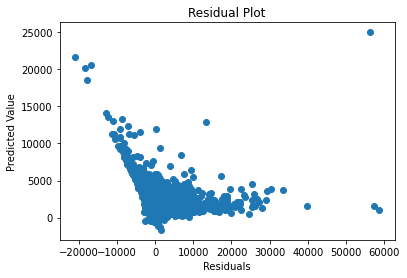

In [66]:
residuals = y_test - y_pred

plt.scatter(residuals, y_pred)
plt.title("Residual Plot")
plt.xlabel("Residuals")
plt.ylabel("Predicted Value")
plt.show();

In [ ]:
# eval metrics on test and training set

y_pred_train = best_model.predict(X_train)

r2 = r2_score(y_train, y_pred_train)
print("R2:", round(r2, 2))
mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error:", round(mae))
mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error:", round(mse))



In [ ]:
r2 = r2_score(y_test, y_pred)
print("R2:", round(r2, 2))
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", round(mae))
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", round(mse))

In [67]:
# import python scripts we created to help with feature engineering
import os, sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)


from src.learning_curve_plot import learning_curve_plot


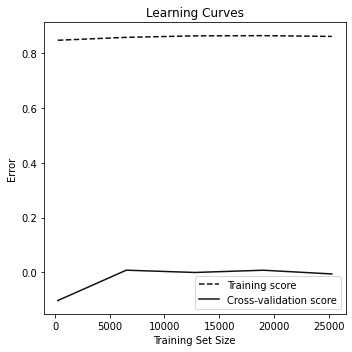

In [68]:
learning_curve_plot(best_model, X_train, y_train, scoring="r2")

In [42]:
# save the model
# hyperparameter tuning

from sklearn.model_selection import GridSearchCV
# use GridSearch to identify the best parameters
# we are using are different values:
# 1. n_estimators (number of trees) 
# 2. max_features (This is in the form of a percentage. For e.g. we use 20% of features)

grid_search = GridSearchCV(RandomForestRegressor(random_state=0),
                           {
                              'n_estimators':np.arange(100, 500,100),
                              'max_features':np.arange(0.1,1.0,0.05),
                            
                            },cv=5, scoring="accuracy",verbose=1,n_jobs=-1
                           )
grid_search.fit(X_train,y_train)



Fitting 5 folds for each of 72 candidates, totalling 360 fits


/Users/shaq/.pyenv/versions/3.8.10/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/shaq/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_features': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'n_estimators': array([100, 200, 300, 400])},
             scoring='accuracy', verbose=1)

In [41]:
np.arange(100, 500,100)

array([100, 200, 300, 400])

In [43]:
# the best parameters

grid_search.best_params_

{'max_features': 0.1, 'n_estimators': 100}

In [44]:
# build a Random Forest Model with these parameters

best_model = RandomForestRegressor(**grid_search.best_params_)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

## Best Model Evaluation - XGBoost

In [77]:
best_model = XGBRegressor()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print(y_pred[0:5])

[1232.5426  1083.8535   191.28148 1873.5494    70.70738]


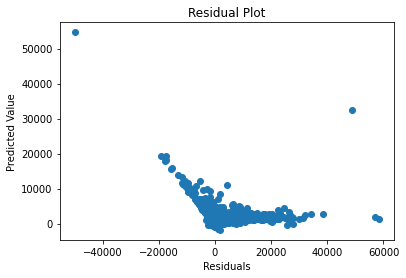

In [78]:
residuals = y_test - y_pred

plt.scatter(residuals, y_pred)
plt.title("Residual Plot")
plt.xlabel("Residuals")
plt.ylabel("Predicted Value")
plt.show();

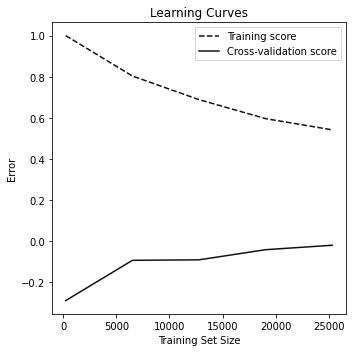

In [79]:
learning_curve_plot(best_model, X_train, y_train, scoring="r2")

In [80]:
# eval metrics on test and training set

y_pred_train = best_model.predict(X_train)

r2 = r2_score(y_train, y_pred_train)
print("R2:", round(r2, 2))
mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error:", round(mae))
mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error:", round(mse))

R2: 0.49
Mean Absolute Error: 998
Mean Squared Error: 4041580


In [81]:
r2 = r2_score(y_test, y_pred)
print("R2:", round(r2, 2))
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", round(mae))
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", round(mse))

R2: 0.05
Mean Absolute Error: 1217
Mean Squared Error: 6764436


In [82]:
# both models are showing signs of overfitting, low r2 score and high errors.
# Next steps would include removing outliers to see if this would improve the results.
# It is also possible that this is not a useful target, and it is not possible to make
# however, some initial learnings we could take are from the feature importance plots 
# which show us some useful patterns for e.g. duration and tenure are important features